# IT Incident SLA Breach Analysis (Python Project)

### Overview
This project analyzes IT incident management data to identify SLA breaches, root causes, and workload patterns.  
The goal is to improve service performance, reduce delays, and raise SLA compliance with Python.

---

### Tools & Libraries
- Python: Pandas, Matplotlib, Seaborn, Statsmodels, Scipy
- Jupyter Notebook
- Kaggle Dataset:  ServiceNow IT Incident Log Dataset

---

### ⚙️ Project Steps
1. **Data Loading & Cleaning** – parse dates, drop nulls, basic sanity checks 
2. **Feature Engineering** – `handle_time_hours`, `sla_breached`, month, priority buckets  
3. **Exploratory Analysis** – Breach rates by priority, category, and assignment group  
4. **Statistical Tests** – two-proportion Z-test (high vs low priority), one-way ANOVA (means across priorities)  
5. **Trend & Correlation Analysis**  
6. **KPI Dashboard Summary & Recommendations**

---

### 🧾 Dataset Info
- 140,000+ incident records  
- Key Fields: `priority`, `category`, `opened_at`, `closed_at`, `assignment_group`, `handle_time_hours`, `sla_breached`, `reassignment_count`.

---

# IT Incident SLA Analysis

## Executive Summary
- SLA breach rate: 60.64%
- Average handle time: **409.49 hours** (about 17 days)
- Maximum handle time: **8,190.62 hours** (about 341 days)
- Correlations: handle time increases breach (**r = 0.35**); reassignments increase breach (**r = 0.31**)
- Priority effect: Z-test shows no significant difference between high and low priority breach rates

## KPI Snapshot
| Metric | Value |
|---|---:|
| Total Tickets | 141,712.00 |
| SLA Breach % | 60.64 |
| Avg Handle Time (hrs) | 409.49 |
| Max Handle Time (hrs) | 8,190.62 |
| Avg Reassignment Count | 1.10 |

## Statistical Tests
- **Two-proportion Z-test (high vs low priority):** not significant
- **One-way ANOVA (all priorities):** significant differences across priorities

## Operational Insights
- Escalation does not guarantee faster resolution; high priority breach rate = low priority breach rate.
- Monthly breach percentage varies without steady improvement.
- Some categories and assignment groups have breach rates over **90 percent**.
- Longer handle time increases breach likelihood (**r = 0.35**).
- More reassignments increase breach likelihood (**r = 0.31**).

## Recommendations
1. Rebalance work across overloaded assignment groups.
2. Add early alerts for tickets close to SLA limits.
3. Review SLA limits for lower priorities (for example, 168 hours).
4. Do root-cause reviews for tickets over 500 hours and remove blockers.
5. Publish this analysis as a dashboard and track monthly.

## Business Impact
- Fewer SLA breaches and faster resolution times
- Better customer satisfaction and contract compliance
- Higher team productivity and clearer bottlenecks
- Ongoing, data-driven improvement


In [4]:
!pip install kagglehub

import kagglehub

path = kagglehub.dataset_download("shamiulislamshifat/it-incident-log-dataset")
print("Path to dataset files:", path)


100%|██████████| 2.45M/2.45M [00:00<00:00, 12.4MB/s]

Extracting files...


Path to dataset files: C:\Users\shoai\.cache\kagglehub\datasets\shamiulislamshifat\it-incident-log-dataset\versions\1


incident_event_log.csv
       number incident_state  active  reassignment_count  reopen_count  \
0  INC0000045            New    True                   0             0   
1  INC0000045       Resolved    True                   0             0   
2  INC0000045       Resolved    True                   0             0   
3  INC0000045         Closed   False                   0             0   
4  INC0000047            New    True                   0             0   

   sys_mod_count  made_sla    caller_id       opened_by        opened_at  ...  \
0              0      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
1              2      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
2              3      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
3              4      True  Caller 2403    Opened by  8  29/2/2016 01:16  ...   
4              0      True  Caller 2403  Opened by  397  29/2/2016 04:40  ...   

  u_priority_confirmation         notify prob

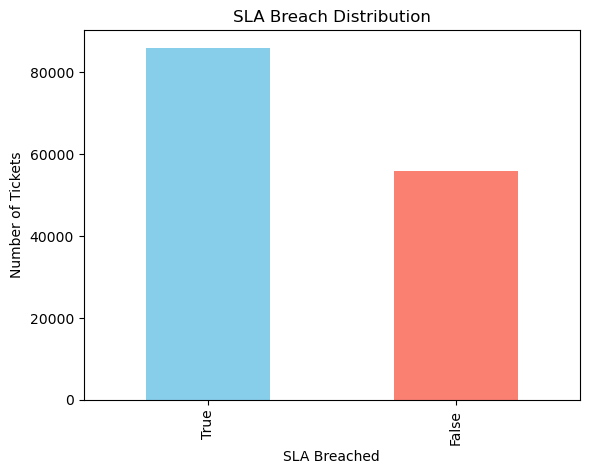

priority
1 - Critical    0.616918
3 - Moderate    0.608009
4 - Low         0.576923
2 - High        0.567631
Name: sla_breached, dtype: float64


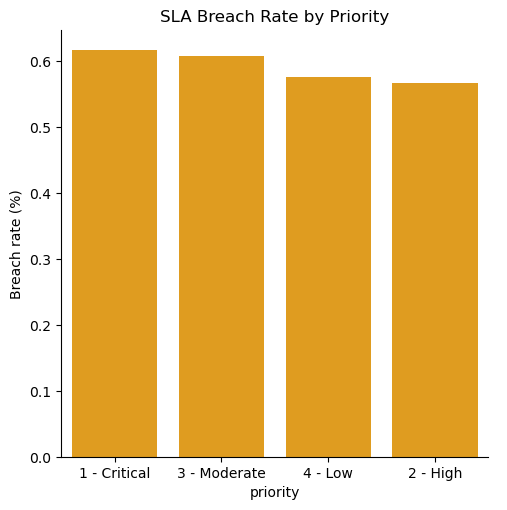

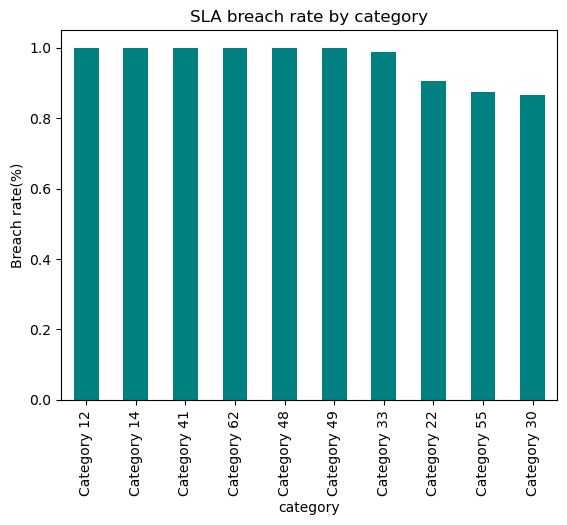

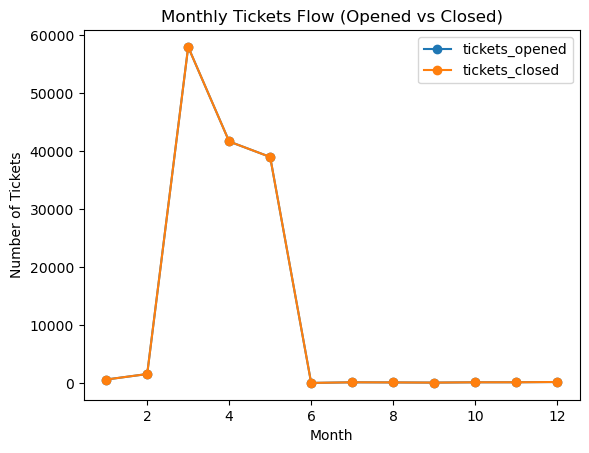

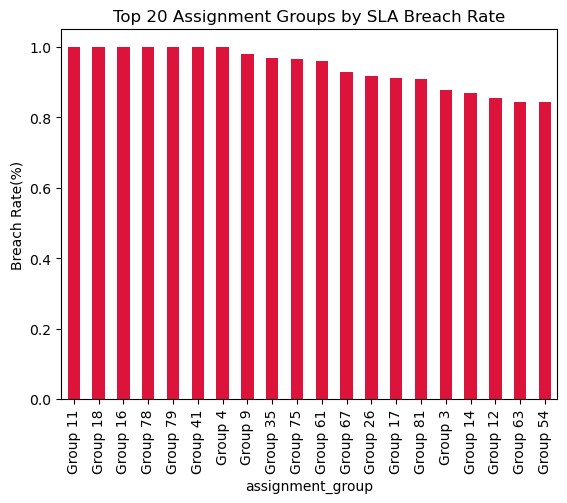

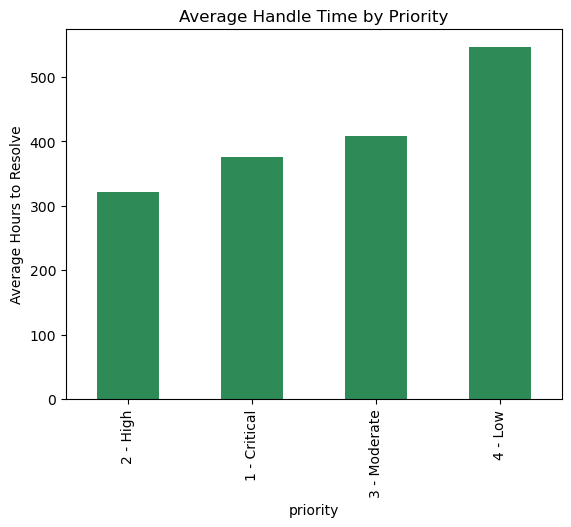

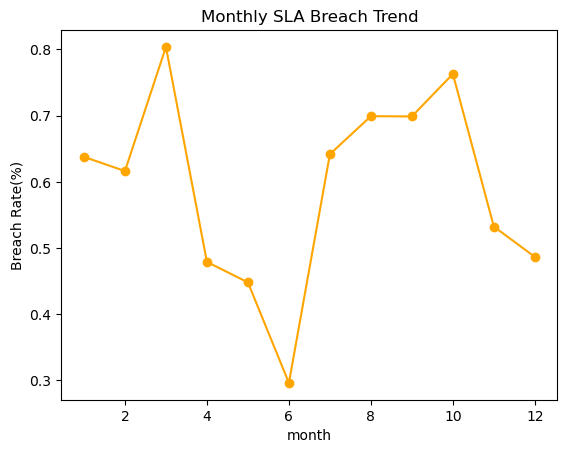

                    reassignment_count  handle_time_hours  sla_breached
reassignment_count            1.000000           0.157367      0.307053
handle_time_hours             0.157367           1.000000      0.347303
sla_breached                  0.307053           0.347303      1.000000
Z-statistics: -0.7769
P-value: 0.437208
No significant difference: SLA breach rate is statistically similar for High and Low priority tickets.
F-statistics: 79.9070
P-value: 0.000000
Significant difference: Mean handle times vary among priorities
                   Metric      Value
0           Total Tickets  141712.00
1            SLA Breach %      60.64
2   Avg Handle Time (hrs)     409.49
3   Max Handle Time (hrs)    8190.62
4  Avg Reassignment Count       1.10


C:\Users\shoai\AppData\Local\Temp\ipykernel_111200\1930661829.py:210: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_df, x='Metric', y='Value', palette='viridis')


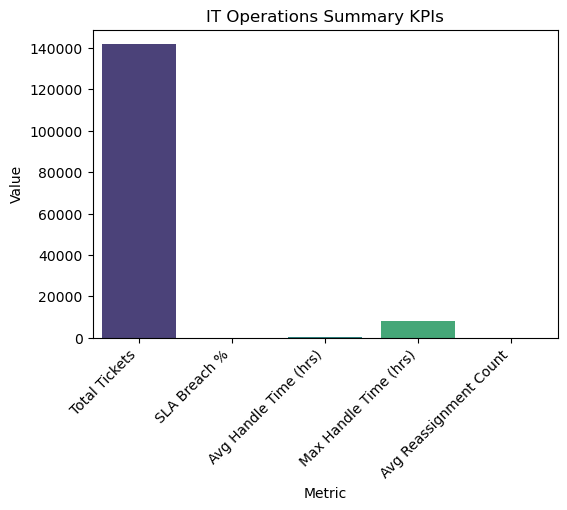

In [69]:
import pandas as pd
import os

# Locate CSV file inside the downloaded folder
for file in os.listdir(path):
    print(file)

incident_event_log = pd.read_csv(os.path.join(path, "incident_event_log.csv"))
print(incident_event_log.head())

#verifying non null columns and datat types
info = incident_event_log.info()
print(f"Dataframe Info {info}")


#verify Nulls
nulls = incident_event_log.isnull().sum().sort_values(ascending=False)
print(f"Nulls {nulls}")


#Convert the date columns
date_cols = ['opened_at', 'resolved_at', 'closed_at']
incident_event_log[date_cols] = incident_event_log[date_cols].apply(pd.to_datetime, dayfirst=True, errors = 'coerce')


#Calculate handle time in hours
incident_event_log['handle_time_hours'] = ((incident_event_log['closed_at'] - incident_event_log['opened_at']).dt.total_seconds()/3600)
incident_event_log[['opened_at','closed_at','handle_time_hours']].head()



#Define SLA Threshold 
SLA_threshold = 168 #3days

#Flag SLA breaches 
incident_event_log['sla_breached'] = incident_event_log['handle_time_hours'] > SLA_threshold

#view summary
incident_event_log['sla_breached'].value_counts()

#visualize and analyze the breach pattern 
import matplotlib.pyplot as plt
import seaborn as sns
incident_event_log['sla_breached'].value_counts().plot(
    kind= 'bar',
    title = 'SLA Breach Distribution',
    color = ['skyblue','salmon']
)
plt.xlabel('SLA Breached')
plt.ylabel('Number of Tickets')
plt.show()


#1. SLA Breach Analysis by Priority
#if high-priority tickets are being delayed more than they should be.
sla_by_priority = incident_event_log.groupby('priority')['sla_breached'].mean().sort_values(ascending=False)
print(sla_by_priority)

#converting it into dataframe
sla_by_priority_df = sla_by_priority.reset_index()

#visualizing sla by priority
sns.catplot(data = sla_by_priority_df, x='priority', y='sla_breached', kind= 'bar', color='orange')
plt.ylabel('Breach rate (%)')
plt.title('SLA Breach Rate by Priority')
plt.show()


#2. SLA Breach Analysis by Category
#which service areas (e.g., “Network,” “Software,” etc.) are causing the most breaches.
sla_by_category = (incident_event_log.groupby('category')['sla_breached'].mean().sort_values(ascending=False).head(10))
sla_by_category.plot(kind='bar', color= 'teal', title='SLA breach rate by category')
plt.ylabel('Breach rate(%)')
plt.show()


#Throughput Trend - Workload vs Resolution
#are more tickets being opened than closed each month?

#Fixed missing or unparsed dates
incident_event_log = incident_event_log.dropna(subset=['opened_at','closed_at'])

#creating month's column
incident_event_log['month'] = incident_event_log['opened_at'].dt.month

#counted how many tickets opened and closed each month
monthly_opened = incident_event_log.groupby('month')['number'].count()
monthly_closed = incident_event_log.groupby('month')['closed_at'].count()

#combined both counts into a table 
monthly_stats = pd.DataFrame({
    'tickets_opened': monthly_opened,
    'tickets_closed': monthly_closed
})

monthly_stats.plot(kind='line', marker='o', title='Monthly Tickets Flow (Opened vs Closed)')
plt.ylabel('Number of Tickets')
plt.xlabel('Month')
plt.show()                  

#Analyzing SLA breaches by assignment group to find which support teams are consistently missing their SLAs.
#Goal: to identify if certain teams (e.g., Network, Database, Service Desk) are overloaded or underperforming
sla_by_group = (
    incident_event_log.groupby('assignment_group')['sla_breached'].mean().sort_values(ascending=False).head(20)
)

sla_by_group.plot(kind= 'bar', color='crimson', title='Top 20 Assignment Groups by SLA Breach Rate')
plt.ylabel('Breach Rate(%)')
plt.show()


#Analyzing handle time by priority to see if higher priority incidents are actually being resolved faster (as they should be).
#Goal: to spot gaps e.g. “High” priority taking longer than “Moderate” priority?
priority_handle_time = (
    incident_event_log.groupby('priority')['handle_time_hours'].mean().sort_values()
)
priority_handle_time.plot(kind='bar', color='seagreen', title='Average Handle Time by Priority')
plt.ylabel('Average Hours to Resolve')
plt.show()


#Trend SLA breaches over time, visualizing of breach frequency is increasing or improving?
#Goal: to show improvement or deterioration over time.
incident_event_log['month'] = incident_event_log['opened_at'].dt.month
sla_trend = incident_event_log.groupby('month')['sla_breached'].mean()

sla_trend.plot(kind='line', marker='o', color='orange', title='Monthly SLA Breach Trend')
plt.ylabel('Breach Rate(%)')
plt.show()

#Correlation Check to see which factors are most related to SLA breaches (priority, category, reassignment count, etc)
#Goal: is to find if frequent reassignments or long hanle times strongly relate to SLA breaches?
correlation = incident_event_log[['reassignment_count','handle_time_hours','sla_breached']].corr()
print(correlation)


                          ## Inferential Statistics (Validation Tests)

# 1. Two-Proportion Z-Test: SLA Breach Rate by Priority (High vs Low)
#Is the SLA breach proportion for “High priority” tickets significantly different from “Low priority” tickets?
from statsmodels.stats.proportion import proportions_ztest

#counting SLA breaches in HIgh and Low Priority
counts = [
    incident_event_log[incident_event_log['priority'] == '2 - High']['sla_breached'].sum(),
    incident_event_log[incident_event_log['priority'] == '4 - Low']['sla_breached'].sum()
]

#Total tickets in High and Low Priority
nobs = [
    incident_event_log[incident_event_log['priority'] == '2 - High'].shape[0],
    incident_event_log[incident_event_log['priority'] == '4 - Low'].shape[0]
]

#run two proportion z-test (assuming that data is normal, independent, have > 30 sample size and follow bell shape curve)
stat, pval = proportions_ztest(count=counts, nobs=nobs)
print(f'Z-statistics: {stat:.4f}')
print(f'P-value: {pval:.6f}')

if pval < 0.05:
    print('Significant difference: SLA breach differs between High and Low priority Tickets.')

else:
    print('No significant difference: SLA breach rate is statistically similar for High and Low priority tickets.')


# 2. One-Way ANOVA: Comparing average Handle Time across all four Priorities
from scipy import stats

#Grouping handle times by priority
groups = [
    incident_event_log[incident_event_log['priority'] == '1 - Critical']['handle_time_hours'].dropna(),
    incident_event_log[incident_event_log['priority'] == '2 - High']['handle_time_hours'].dropna(),
    incident_event_log[incident_event_log['priority'] == '3 - Moderate']['handle_time_hours'].dropna(),
    incident_event_log[incident_event_log['priority'] == '4 - Low']['handle_time_hours'].dropna()
]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f'F-statistics: {f_stat:.4f}')
print(f'P-value: {p_value:.6f}')

if p_value < 0.05:
    print('Significant difference: Mean handle times vary among priorities')
else:
    print('No significant difference: Mean handle times are statistically similar')

    
#Quick View of Dataset's Key Metrics, KPI Snapshot for Management
summary = {
    "Total Tickets": len(incident_event_log),
    "SLA Breach %": round(incident_event_log["sla_breached"].mean() * 100, 2),
    "Avg Handle Time (hrs)": round(incident_event_log["handle_time_hours"].mean(), 2),
    "Max Handle Time (hrs)": round(incident_event_log["handle_time_hours"].max(), 2),
    "Avg Reassignment Count": round(incident_event_log['reassignment_count'].mean(),2)
}

#convert dictionary into DataFrame using .items()
summary_df = pd.DataFrame(summary.items(), columns=['Metric','Value'])

print(summary_df)

#visualizing KPI Dashboard 
plt.figure(figsize=(6,4))
sns.barplot(data=summary_df, x='Metric', y='Value', palette='viridis')
plt.title('IT Operations Summary KPIs')
plt.xticks(rotation=45, ha='right')
plt.show()